In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [5]:
df = pd.read_csv("TSLA.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [8]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2908,False,False,False,False,False,False,False
2909,False,False,False,False,False,False,False
2910,False,False,False,False,False,False,False
2911,False,False,False,False,False,False,False


In [9]:
 df.set_index('Date',inplace= True) #For making changes in df inplace= True is used

In [10]:
df.index= pd.to_datetime(df.index) #Converting date to datetime

In [11]:
print (df)

                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2010-06-29     3.800000     5.000000  ...     4.778000  93831500
2010-06-30     5.158000     6.084000  ...     4.766000  85935500
2010-07-01     5.000000     5.184000  ...     4.392000  41094000
2010-07-02     4.600000     4.620000  ...     3.840000  25699000
2010-07-06     4.000000     4.000000  ...     3.222000  34334500
...                 ...          ...  ...          ...       ...
2022-01-14  1019.880005  1052.000000  ...  1049.609985  24246600
2022-01-18  1026.609985  1070.790039  ...  1030.510010  22247800
2022-01-19  1041.709961  1054.670044  ...   995.650024  25147500
2022-01-20  1009.729980  1041.660034  ...   996.270020  23496200
2022-01-21   996.340027  1004.549988  ...   943.900024  34126500

[2913 rows x 6 columns]


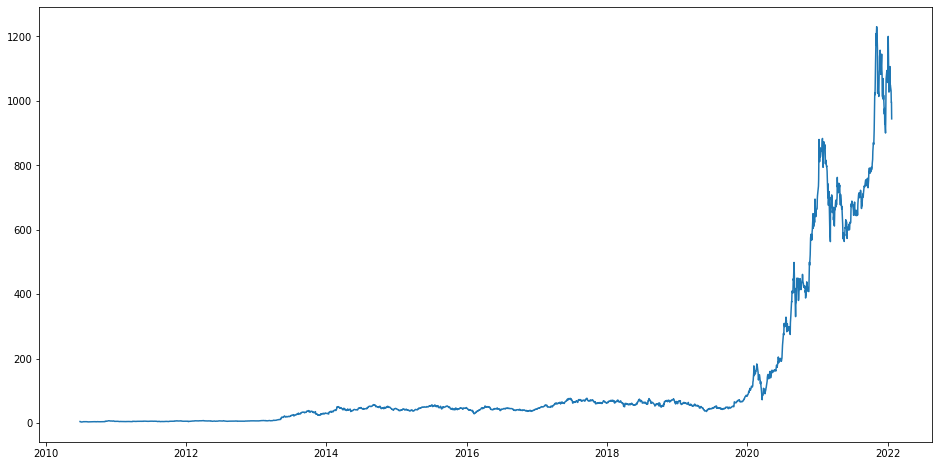

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Closing Price')

In [14]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2908,2022-01-14,1019.880005,1052.000000,1013.380005,1049.609985,1049.609985,24246600
2909,2022-01-18,1026.609985,1070.790039,1016.059998,1030.510010,1030.510010,22247800
2910,2022-01-19,1041.709961,1054.670044,995.000000,995.650024,995.650024,25147500
2911,2022-01-20,1009.729980,1041.660034,994.000000,996.270020,996.270020,23496200


In [15]:
#Make new data frame using date & Close to train the model 

model_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(df)): 
  model_data['Date'][i] = df['Date'][i]
  model_data['Close'][i] = df['Close'][i]

model_data['Date'] = pd.to_datetime(df.Date,format="%y-%m-%d")
model_data

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.84
4,2010-07-06,3.222
...,...,...
2908,2022-01-14,1049.61
2909,2022-01-18,1030.51
2910,2022-01-19,995.65
2911,2022-01-20,996.27


In [ ]:
#Using Scaler to put vlues between 0 & 1
##from sklearn.preprocessing import MinMaxScaler
##scaler= MinMaxScaler(feature_range= (0,1))
##closedf = scaler.fit_transform(np.array(model_data['Close']).reshape(-1,1)) #
##closedf

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80904014],
       [0.80954554],
       [0.76685551]])

In [20]:
training_size = int(len(model_data)*0.8)
test_size = len(model_data) - training_size
print(training_size)
print(test_size)


2330
583


In [30]:
#Adding model data values into final dataset
final_dataset = model_data.values  
train_data = final_dataset[0:training_size,:]
test_data = final_dataset[training_size + 1:,: ]
print(train_data)
print(test_data)

[[Timestamp('2010-06-29 00:00:00') 4.778]
 [Timestamp('2010-06-30 00:00:00') 4.766]
 [Timestamp('2010-07-01 00:00:00') 4.392]
 ...
 [Timestamp('2019-09-26 00:00:00') 48.512001]
 [Timestamp('2019-09-27 00:00:00') 48.425999]
 [Timestamp('2019-09-30 00:00:00') 48.174]]
[[Timestamp('2019-10-02 00:00:00') 48.625999]
 [Timestamp('2019-10-03 00:00:00') 46.605999]
 [Timestamp('2019-10-04 00:00:00') 46.285999]
 ...
 [Timestamp('2022-01-19 00:00:00') 995.650024]
 [Timestamp('2022-01-20 00:00:00') 996.2700199999999]
 [Timestamp('2022-01-21 00:00:00') 943.900024]]


In [34]:
model_data.index = model_data.Date
model_data.drop("Date", axis = 1, inplace = True)
final_dataset = model_data.values


In [35]:
final_dataset

array([[4.778],
       [4.766],
       [4.392],
       ...,
       [995.650024],
       [996.2700199999999],
       [943.900024]], dtype=object)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(final_dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80904014],
       [0.80954554],
       [0.76685551]])

In [37]:
#Separating X train and Y train from the data
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
  x_train_data.append(scaled_data[i-60:i,0])
  y_train_data.append(scaled_data[i,0])

In [38]:
x_train_data,y_train_data = np.array(x_train_data), np.array(y_train_data)
print(x_train_data)

[[1.31893210e-03 1.30915016e-03 1.00427957e-03 ... 8.57550414e-04
  8.10271019e-04 6.63541861e-04]
 [1.30915016e-03 1.00427957e-03 5.54310154e-04 ... 8.10271019e-04
  6.63541861e-04 6.13001817e-04]
 [1.00427957e-03 5.54310154e-04 5.05400434e-05 ... 6.63541861e-04
  6.13001817e-04 7.01039312e-04]
 ...
 [3.40330131e-02 3.57203984e-02 3.54269393e-02 ... 3.67523919e-02
  3.38145481e-02 3.47095992e-02]
 [3.57203984e-02 3.54269393e-02 3.49769715e-02 ... 3.38145481e-02
  3.47095992e-02 3.69692274e-02]
 [3.54269393e-02 3.49769715e-02 3.49313224e-02 ... 3.47095992e-02
  3.69692274e-02 3.68991219e-02]]


In [41]:
print (y_train_data)

[0.000613   0.00070104 0.00077114 ... 0.03696923 0.03689912 0.0366937 ]


In [42]:
#Lstm model (Long Short term memory)
from keras.models import Sequential
from keras.layers import LSTM, Dropout,Dense

lstm_model = Sequential()
lstm_model.add(LSTM(units=50,return_sequences= True, input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

input_data = model_data[len(model_data)- len(test_data)-60:].values
print(input_data)


[[46.012001]
 [47.784]
 [47.720001]
 [49.015999]
 [50.700001]
 [50.476002]
 [50.972]
 [50.708]
 [51.636002000000005]
 [51.136002000000005]
 [52.034]
 [52.976002]
 [45.764]
 [45.608002]
 [47.153999]
 [48.452]
 [48.321999]
 [46.77]
 [46.868]
 [45.664001]
 [46.150002]
 [46.683997999999995]
 [47.66]
 [47.001999]
 [45.801998]
 [47.0]
 [43.924]
 [43.127998]
 [43.987999]
 [45.366001000000004]
 [45.172001]
 [44.166]
 [44.43]
 [42.279999]
 [43.0]
 [42.816002000000005]
 [43.118]
 [44.341999]
 [45.122002]
 [45.001999]
 [44.136002000000005]
 [45.916]
 [45.490002000000004]
 [46.358002]
 [47.108002]
 [49.419998]
 [49.174]
 [49.040001000000004]
 [48.562]
 [48.958]
 [48.698002]
 [49.32]
 [48.124001]
 [48.245998]
 [44.641998]
 [45.740002000000004]
 [48.512001]
 [48.425999]
 [48.174]
 [48.938]
 [48.625999]
 [46.605999]
 [46.285999]
 [47.543999]
 [48.009997999999996]
 [48.905998]
 [48.948002]
 [49.577999]
 [51.391998]
 [51.577999]
 [51.950001]
 [52.394001]
 [51.389998999999996]
 [50.700001]
 [51.11600100

In [43]:
input_data = input_data.reshape(-1,1)
print(input_data)

[[46.012001]
 [47.784]
 [47.720001]
 [49.015999]
 [50.700001]
 [50.476002]
 [50.972]
 [50.708]
 [51.636002000000005]
 [51.136002000000005]
 [52.034]
 [52.976002]
 [45.764]
 [45.608002]
 [47.153999]
 [48.452]
 [48.321999]
 [46.77]
 [46.868]
 [45.664001]
 [46.150002]
 [46.683997999999995]
 [47.66]
 [47.001999]
 [45.801998]
 [47.0]
 [43.924]
 [43.127998]
 [43.987999]
 [45.366001000000004]
 [45.172001]
 [44.166]
 [44.43]
 [42.279999]
 [43.0]
 [42.816002000000005]
 [43.118]
 [44.341999]
 [45.122002]
 [45.001999]
 [44.136002000000005]
 [45.916]
 [45.490002000000004]
 [46.358002]
 [47.108002]
 [49.419998]
 [49.174]
 [49.040001000000004]
 [48.562]
 [48.958]
 [48.698002]
 [49.32]
 [48.124001]
 [48.245998]
 [44.641998]
 [45.740002000000004]
 [48.512001]
 [48.425999]
 [48.174]
 [48.938]
 [48.625999]
 [46.605999]
 [46.285999]
 [47.543999]
 [48.009997999999996]
 [48.905998]
 [48.948002]
 [49.577999]
 [51.391998]
 [51.577999]
 [51.950001]
 [52.394001]
 [51.389998999999996]
 [50.700001]
 [51.11600100

In [45]:
input_data = scaler.transform(input_data)

In [46]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=50, batch_size=10,verbose=2)

Epoch 1/50
227/227 - 7s - loss: 3.6243e-05 - 7s/epoch - 33ms/step
Epoch 2/50
227/227 - 5s - loss: 6.0280e-06 - 5s/epoch - 22ms/step
Epoch 3/50
227/227 - 5s - loss: 5.5418e-06 - 5s/epoch - 21ms/step
Epoch 4/50
227/227 - 5s - loss: 5.0918e-06 - 5s/epoch - 21ms/step
Epoch 5/50
227/227 - 5s - loss: 4.3624e-06 - 5s/epoch - 22ms/step
Epoch 6/50
227/227 - 5s - loss: 4.4266e-06 - 5s/epoch - 22ms/step
Epoch 7/50
227/227 - 5s - loss: 4.4772e-06 - 5s/epoch - 21ms/step
Epoch 8/50
227/227 - 6s - loss: 3.6745e-06 - 6s/epoch - 26ms/step
Epoch 9/50
227/227 - 5s - loss: 3.4177e-06 - 5s/epoch - 23ms/step
Epoch 10/50
227/227 - 5s - loss: 3.0910e-06 - 5s/epoch - 21ms/step
Epoch 11/50
227/227 - 5s - loss: 2.9930e-06 - 5s/epoch - 22ms/step
Epoch 12/50
227/227 - 5s - loss: 3.1286e-06 - 5s/epoch - 22ms/step
Epoch 13/50
227/227 - 5s - loss: 3.2777e-06 - 5s/epoch - 21ms/step
Epoch 14/50
227/227 - 5s - loss: 2.4608e-06 - 5s/epoch - 22ms/step
Epoch 15/50
227/227 - 5s - loss: 2.6492e-06 - 5s/epoch - 22ms/step
Epoc

In [47]:
x_test=[]
for i in range(60,input_data.shape[0]):
  x_test.append(input_data[i-60:i,0])

x_test = np.array(x_test)

In [48]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_closing_price=lstm_model.predict(x_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [49]:
lstm_model.save("saved_model.h5")

In [50]:
predicted_closing_price.shape

(582, 1)

In [51]:
from re import findall
final_df = model_data.copy(deep=True)
final_df = final_df[training_size + 1:]
final_df.shape


(582, 1)

In [52]:
final_df['Pred']= predicted_closing_price

In [53]:
final_df

,Close,Pred
Date,,
2019-10-02,48.626,49.158379
2019-10-03,46.606,48.856667
2019-10-04,46.286,46.904572
2019-10-07,47.544,46.572605
2019-10-08,48.01,47.785877
...,...,...
2022-01-14,1049.61,954.309204
2022-01-18,1030.51,962.951111
2022-01-19,995.65,948.984253


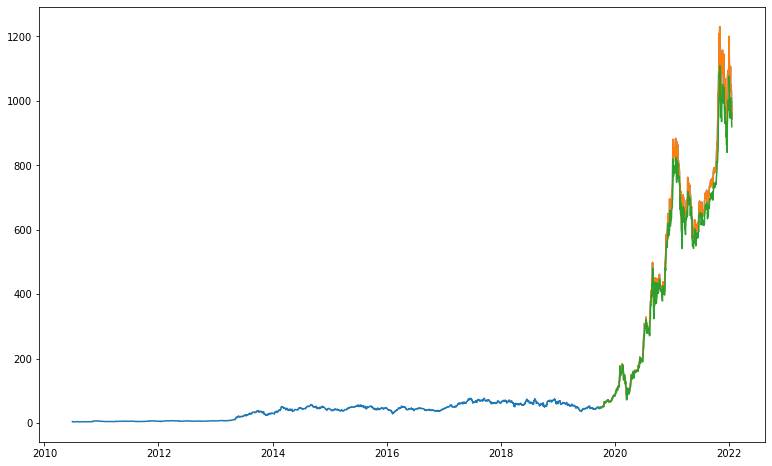

In [59]:
plt.figure(figsize=(13,8))
plt.plot(model_data['Close'])
plt.plot(final_df[['Close','Pred']])

In [60]:
import math
from sklearn.metrics import mean_squared_error, r2_score

testScore = math.sqrt(mean_squared_error(final_df['Close'],final_df['Pred']))
print('Root Mean Square Error Score: %.2f RMSE'%(testScore))

r2 = r2_score(final_df['Close'],final_df['Pred'])
print('R2_score: %.2f R2' %(r2)) #Finding Accuracy of Model


Root Mean Square Error Score: 44.30 RMSE
R2_score: 0.98 R2


In [ ]:
#ARIMA MODEL

In [63]:
 from statsmodels.tsa.arima_model import ARIMA, ARMA

import warnings
warnings.filterwarnings("ignore")

In [64]:
new_df = df.copy(deep=True)

In [65]:
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2908,2022-01-14,1019.880005,1052.000000,1013.380005,1049.609985,1049.609985,24246600
2909,2022-01-18,1026.609985,1070.790039,1016.059998,1030.510010,1030.510010,22247800
2910,2022-01-19,1041.709961,1054.670044,995.000000,995.650024,995.650024,25147500
2911,2022-01-20,1009.729980,1041.660034,994.000000,996.270020,996.270020,23496200


In [66]:
import statsmodels.api as sm 

In [67]:
#Forecasting libs
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

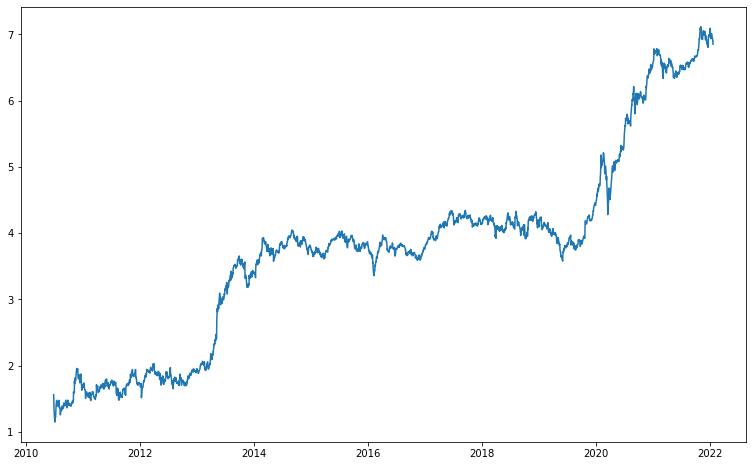

In [69]:
plt.figure(figsize=(13,8))
df_log = np.log(model_data.astype(np.float64))
plt.plot(df_log)

In [70]:
#function to stabilize data
def get_stationarity(timeseries):

  #Rolling statistics
  rolling_mean = timeseries.rolling(window=8).mean()
  rolling_std = timeseries.rolling(window=8).std()

  #rolling statistics plot
  original = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolling_mean, color='red',label='Rolling Mean')
  std=plt.plot(rolling_std, color='green',label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Dickey-Fuller test:
  result = adfuller(timeseries['Close'])
  print('ADF Statistic: {}'.format(result[0]))
  print('p value: {}'.format(result[1]))
  print('Critical Values:')
  for key,value in result[4].items():
    print('\t{}: {}'.format(key,value))

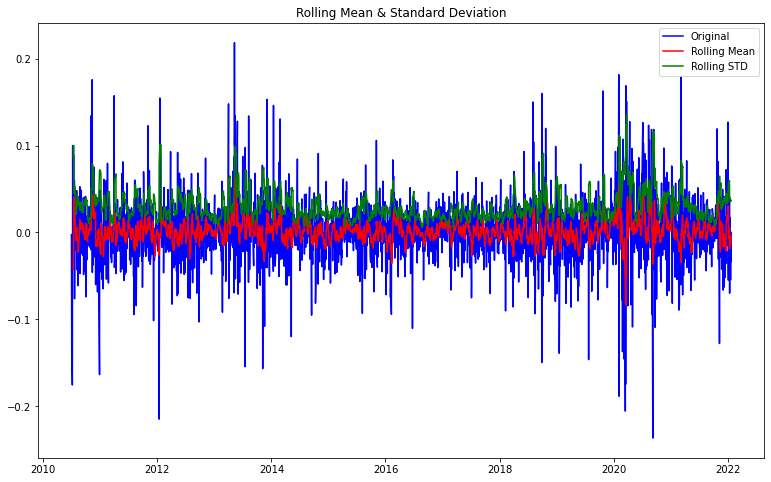

ADF Statistic: -53.779908672915596
p value: 0.0
Critical Values:
	1%: -3.432598394289631
	5%: -2.8625333903153836
	10%: -2.5672988096738214


In [72]:
plt.figure(figsize=(13,8))
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

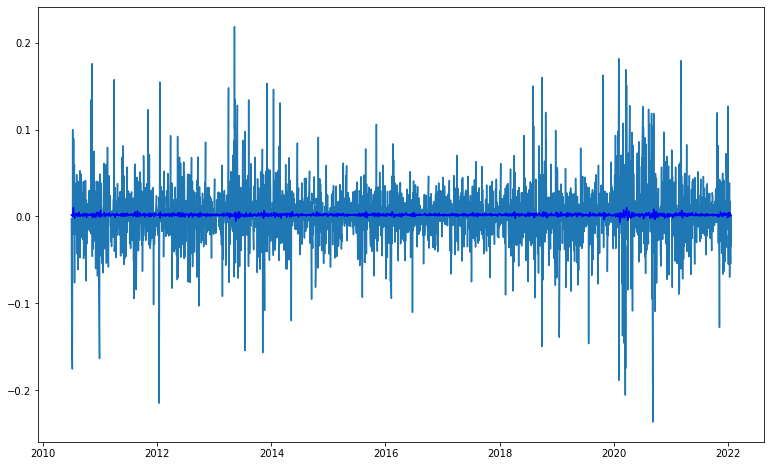

In [73]:
#Training log_df, (p,q,d) =(4,1,2)

decomposition = seasonal_decompose(df_log, freq=52)
model = ARIMA(df_log, order=(4,1,2))
results = model.fit(disp=0)
plt.figure(figsize=(13,8))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='blue')


In [74]:
#Series for Prediction

predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy = True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [75]:
predictions_ARIMA_log = pd.Series(df_log['Close'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

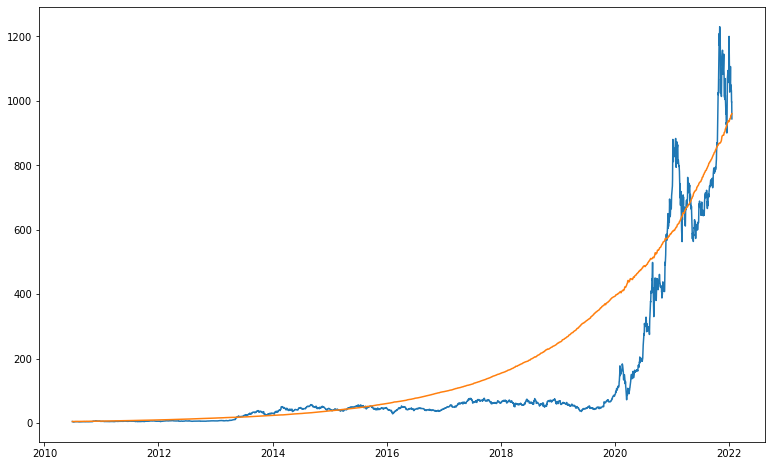

In [76]:
plt.figure(figsize=(13,8))
plt.plot(model_data)
plt.plot(predictions_ARIMA)

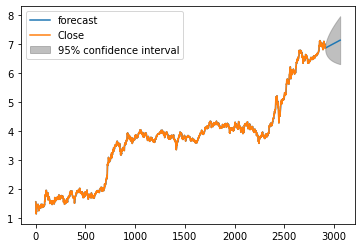

<Figure size 1440x648 with 0 Axes>

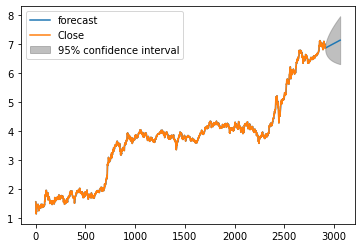

In [82]:
plt.figure(figsize=(20,9))
pd.plotting.register_matplotlib_converters()
results.plot_predict(1,len(model_data)+150)

In [83]:
results.forecast()

(array([6.85168676]), array([0.03528169]), array([[6.78253591, 6.92083761]]))

In [85]:
len(df) 

2913

In [86]:
fc,se,conf = results.forecast(2913,alpha=0.05) #95% conf 

In [87]:
fc

array([ 6.85168676,  6.85437644,  6.8568221 , ..., 12.15969289,
       12.16151535, 12.1633378 ])

In [88]:
prediction_days = 20
final_pred = np.exp(fc)
final_pred = final_pred[:prediction_days+1]
final_pred

array([945.47435099, 948.02080108, 950.34217559, 953.57299869,
       956.83234254, 959.55105186, 961.59481716, 963.10553378,
       964.35615859, 965.61231386, 967.0440647 , 968.70213361,
       970.54329255, 972.4785391 , 974.41963389, 976.30884397,
       978.12775179, 979.88954522, 981.62327654, 983.35831754,
       985.11424485])

In [90]:
#Convert Index into Column
model_data.reset_index(inplace=True)
model_data

model_data["Date"]= pd.to_datetime(model_data.Date,format="%Y-%m-%d")
a = model_data['Date'][len(model_data)-1]
a = str(a)
date = a.split("-")

In [91]:
date

['2022', '01', '21 00:00:00']

In [95]:
day_date = date[2].split(' ')
day_date[0]
day = int(day_date[0])
month = int(date[1])
year = int(date[0])

In [96]:
from datetime import datetime, timedelta

In [102]:
gDate = datetime(year, month, day)
print("Given date is: ", gDate)
tomorrow = gDate + timedelta(days = 1)

Given date is:  2022-01-21 00:00:00


In [103]:
df_5 = pd.DataFrame(index=range(0,prediction_days+1), columns =['Date'])
df_5

,Date
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [106]:
dt_obj= pd.to_datetime(tomorrow,format="%Y-%m-%d")
df_5['Date'][0] = dt_obj
df_5

,Date,future_pred
0,2022-01-22 00:00:00,945.474351
1,2022-01-23 00:00:00,948.020801
2,2022-01-24 00:00:00,950.342176
3,2022-01-25 00:00:00,953.572999
4,2022-01-26 00:00:00,956.832343
5,2022-01-27 00:00:00,959.551052
6,2022-01-28 00:00:00,961.594817
7,2022-01-29 00:00:00,963.105534
8,2022-01-30 00:00:00,964.356159
9,2022-01-31 00:00:00,965.612314


In [107]:
for i in range(1, prediction_days+1):
  df_5['Date'][i]=gDate + timedelta(days= i+1)

df_5

,Date,future_pred
0,2022-01-22 00:00:00,945.474351
1,2022-01-23 00:00:00,948.020801
2,2022-01-24 00:00:00,950.342176
3,2022-01-25 00:00:00,953.572999
4,2022-01-26 00:00:00,956.832343
5,2022-01-27 00:00:00,959.551052
6,2022-01-28 00:00:00,961.594817
7,2022-01-29 00:00:00,963.105534
8,2022-01-30 00:00:00,964.356159
9,2022-01-31 00:00:00,965.612314


In [108]:
df_5['Date']=pd.to_datetime(df_5.Date,format="%Y-%m-%d")


In [109]:
df_5['future_pred']= final_pred
df_5

,Date,future_pred
0,2022-01-22,945.474351
1,2022-01-23,948.020801
2,2022-01-24,950.342176
3,2022-01-25,953.572999
4,2022-01-26,956.832343
5,2022-01-27,959.551052
6,2022-01-28,961.594817
7,2022-01-29,963.105534
8,2022-01-30,964.356159
9,2022-01-31,965.612314


In [112]:
model_data

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.84
2010-07-06,3.222
...,...
2022-01-14,1049.61
2022-01-18,1030.51
2022-01-19,995.65


In [113]:

##model_data = model_data.set_index('Date')
df_5 = df_5.set_index('Date')

In [114]:
df_6 = pd.concat([model_data, df_5])
df_6

,Close,future_pred
Date,,
2010-06-29,4.778,NaN
2010-06-30,4.766,NaN
2010-07-01,4.392,NaN
2010-07-02,3.84,NaN
2010-07-06,3.222,NaN
...,...,...
2022-02-07,NaN,978.127752
2022-02-08,NaN,979.889545
2022-02-09,NaN,981.623277


In [115]:
final_df['Pred'].shape

(582,)

In [117]:
plotdf = pd.DataFrame({'date': df_6.index,
                       'original_close': df_6['Close'],
                       'lstm_test_pred': final_df['Pred'],
                        'train_predicted_close': model_data['Close'],
                       'future_predicted_close': df_6['future_pred']})

In [119]:
import plotly.express as px
title_variable = "TESLA Stock Prediction"

fig=px.line(plotdf,x=plotdf['date'], y=plotdf['original_close'], title = title_variable)
fig.add_traces(
    list(px.line(plotdf, x='date', y='lstm_test_pred',color_discrete_sequence =['red']).select_traces())
)

fig.add_traces(
    list(px.line(plotdf, x='date', y='train_predicted_close',color_discrete_sequence =['green']).select_traces())
)

fig.add_traces(
    list(px.line(plotdf, x='date', y='future_predicted_close',color_discrete_sequence =['blue']).select_traces())
)

fig.update_layout(
    xaxis_title = 'Date',
    yaxis_title = 'Close',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()